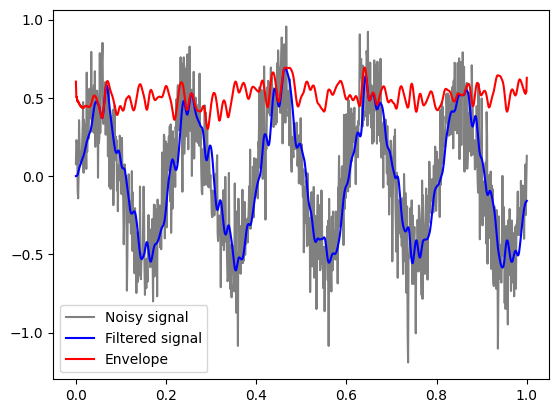

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, hilbert

# Define the sample rate and the duration of the signal
fs = 1000  # Sample rate, Hz
T = 1.0    # Duration of signal, seconds

# Create a time array
t = np.linspace(0, T, int(fs * T), dtype=float)

# Create a clean sine wave
f = 5  # Frequency of the sine wave, Hz
x = 0.5 * np.sin(2 * np.pi * f * t)

# Add some noise to the signal
x_noisy = x + 0.2 * np.random.randn(len(t))

# Create a Butterworth lowpass filter
b, a = butter(4, 0.1, btype='low')
x_filtered = lfilter(b, a, x_noisy)

# Compute the amplitude envelope of the signal using Hilbert transform
analytic_signal = hilbert(x_filtered)
x_envelope = np.abs(analytic_signal)

# Create a plot
fig, ax = plt.subplots()
ax.plot(t, x_noisy, label='Noisy signal', color='grey')
ax.plot(t, x_filtered, label='Filtered signal', color='blue')
ax.plot(t, x_envelope, label='Envelope', color='red')
ax.legend(frameon=True)
plt.show()


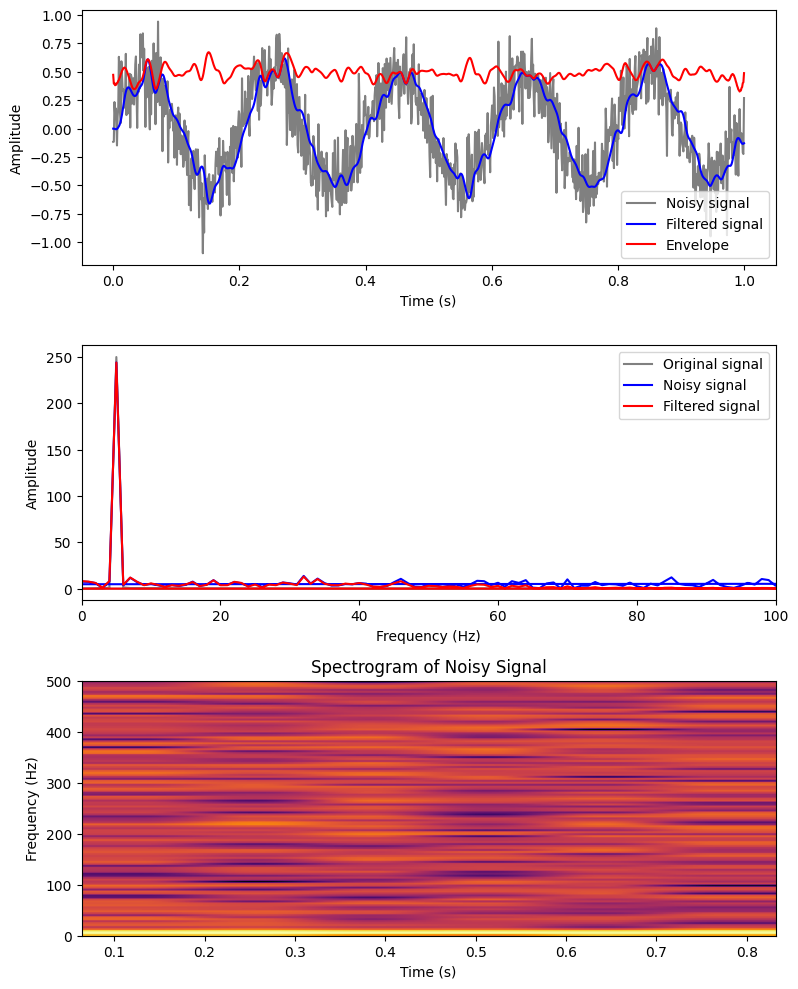

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, hilbert, peak
from scipy.fft import fft, fftfreq

# Define the sample rate and the duration of the signal
fs = 1000  # Sample rate, Hz
T = 1.0    # Duration of signal, seconds

# Create a time array
t = np.linspace(0, T, int(fs * T), dtype=float)

# Create a clean sine wave
f = 5  # Frequency of the sine wave, Hz
x = 0.5 * np.sin(2 * np.pi * f * t)

# Add some noise to the signal
x_noisy = x + 0.2 * np.random.randn(len(t))

# Create a Butterworth lowpass filter
b, a = butter(4, 0.1, btype='low')
x_filtered = lfilter(b, a, x_noisy)

# Compute the amplitude envelope of the signal using Hilbert transform
analytic_signal = hilbert(x_filtered)
x_envelope = np.abs(analytic_signal)

# Compute the frequency spectra of the signals
frequencies = fftfreq(len(t), 1 / fs)
x_fft = fft(x)
x_noisy_fft = fft(x_noisy)
x_filtered_fft = fft(x_filtered)

# Create a plot with multiple subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Plot the original signal, filtered signal, and envelope
axs[0].plot(t, x_noisy, label='Noisy signal', color='grey')
axs[0].plot(t, x_filtered, label='Filtered signal', color='blue')
axs[0].plot(t, x_envelope, label='Envelope', color='red')
axs[0].legend(frameon=True)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')

# Plot the frequency spectra
axs[1].plot(frequencies, np.abs(x_fft), label='Original signal', color='grey')
axs[1].plot(frequencies, np.abs(x_noisy_fft), label='Noisy signal', color='blue')
axs[1].plot(frequencies, np.abs(x_filtered_fft), label='Filtered signal', color='red')
axs[1].set_xlim(0, 100)
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude')
axs[1].legend(frameon=True)

# Plot the spectrogram of the original signal
axs[2].specgram(x_noisy, Fs=fs, cmap='inferno')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Frequency (Hz)')
axs[2].set_title('Spectrogram of Noisy Signal')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


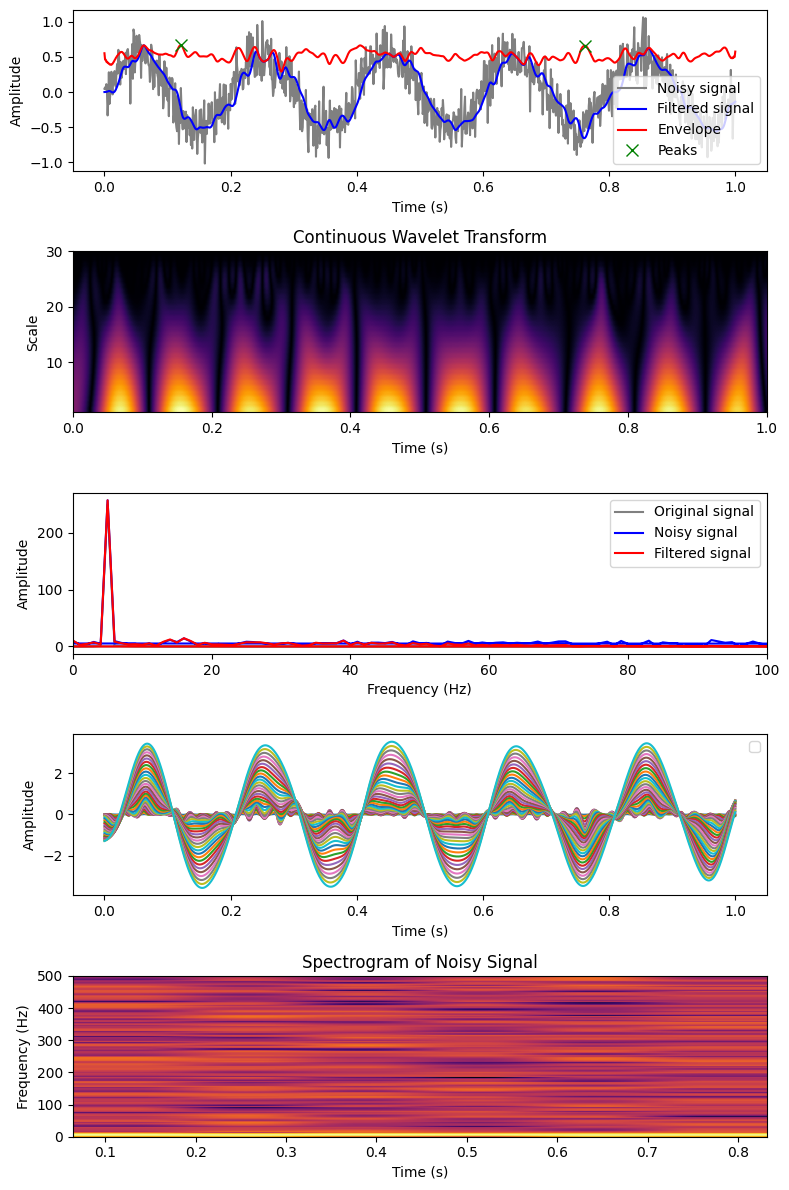

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, hilbert, find_peaks, cwt, ricker

# Define the sample rate and the duration of the signal
fs = 1000  # Sample rate, Hz
T = 1.0    # Duration of signal, seconds

# Create a time array
t = np.linspace(0, T, int(fs * T), dtype=float)

# Create a clean sine wave
f = 5  # Frequency of the sine wave, Hz
x = 0.5 * np.sin(2 * np.pi * f * t)

# Add some noise to the signal
x_noisy = x + 0.2 * np.random.randn(len(t))

# Create a Butterworth lowpass filter
b, a = butter(4, 0.1, btype='low')
x_filtered = lfilter(b, a, x_noisy)

# Compute the amplitude envelope of the signal using Hilbert transform
analytic_signal = hilbert(x_filtered)
x_envelope = np.abs(analytic_signal)

# Find peaks in the envelope signal
peaks, _ = find_peaks(x_envelope, distance=fs // 2)

# Perform continuous wavelet transform (CWT)
widths = np.arange(1, 31)
cwt_coeffs = cwt(x_filtered, ricker, widths)

# Create a plot with multiple subplots
fig, axs = plt.subplots(5, 1, figsize=(8, 12))

# Plot the original signal, filtered signal, and envelope
axs[0].plot(t, x_noisy, label='Noisy signal', color='grey')
axs[0].plot(t, x_filtered, label='Filtered signal', color='blue')
axs[0].plot(t, x_envelope, label='Envelope', color='red')
axs[0].plot(t[peaks], x_envelope[peaks], 'x', color='green', markersize=8, label='Peaks')
axs[0].legend(frameon=True)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')

# Plot the continuous wavelet transform coefficients
axs[1].imshow(np.abs(cwt_coeffs), extent=[t[0], t[-1], widths[0], widths[-1]],
              cmap='inferno', aspect='auto')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Scale')
axs[1].set_title('Continuous Wavelet Transform')

# Plot the frequency spectra
frequencies = np.fft.fftfreq(len(t), 1 / fs)
x_fft = np.fft.fft(x)
x_noisy_fft = np.fft.fft(x_noisy)
x_filtered_fft = np.fft.fft(x_filtered)

axs[2].plot(frequencies, np.abs(x_fft), label='Original signal', color='grey')
axs[2].plot(frequencies, np.abs(x_noisy_fft), label='Noisy signal', color='blue')
axs[2].plot(frequencies, np.abs(x_filtered_fft), label='Filtered signal', color='red')
axs[2].set_xlim(0, 100)
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Amplitude')
axs[2].legend(frameon=True)

# Plot the wavelet coefficients
levels = len(cwt_coeffs)
for i in range(levels):
    axs[3].plot(t, np.real(cwt_coeffs[i]))
axs[3].legend(frameon=True)
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Amplitude')

# Plot the spectrogram of the original signal
axs[4].specgram(x_noisy, Fs=fs, cmap='inferno')
axs[4].set_xlabel('Time (s)')
axs[4].set_ylabel('Frequency (Hz)')
axs[4].set_title('Spectrogram of Noisy Signal')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


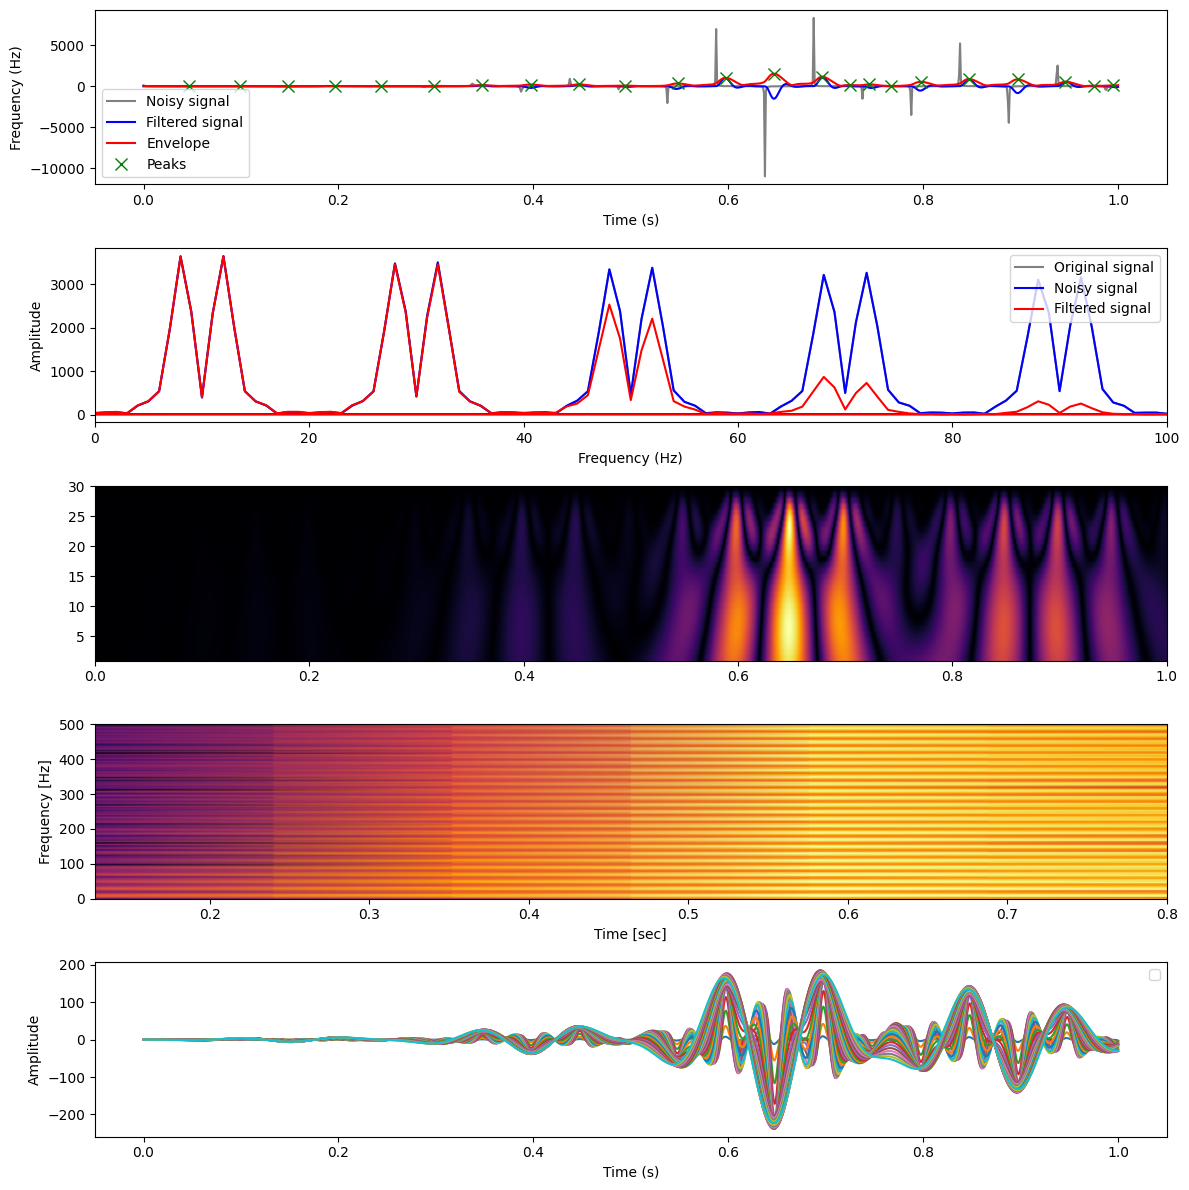

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, hilbert, find_peaks, cwt, ricker, spectrogram

def signal_processing(signal_function, fs=1000, T=1.0, freq=5):
    # Create a time array
    t = np.linspace(0, T, int(fs * T), dtype=float)

    # Generate signal
    x = 0.5 * signal_function(2 * np.pi * freq * t)

    # Add some noise to the signal
    x_noisy = x + 0.2 * np.random.randn(len(t))

    # Create a Butterworth lowpass filter
    b, a = butter(4, 0.1, btype='low')
    x_filtered = lfilter(b, a, x_noisy)

    # Compute the amplitude envelope of the signal using Hilbert transform
    analytic_signal = hilbert(x_filtered)
    x_envelope = np.abs(analytic_signal)

    # Find peaks in the envelope signal
    peaks, _ = find_peaks(x_envelope, prominence=0.1)

    # Perform continuous wavelet transform (CWT)
    widths = np.arange(1, 31)
    cwt_coeffs = cwt(x_filtered, ricker, widths)

    # Compute the frequency spectra
    frequencies = np.fft.fftfreq(len(t), 1 / fs)
    x_fft = np.fft.fft(x)
    x_noisy_fft = np.fft.fft(x_noisy)
    x_filtered_fft = np.fft.fft(x_filtered)

    # Compute the spectrogram of the original signal
    f, time, Sxx = spectrogram(x_noisy, fs)

    # Create a plot with multiple subplots
    fig, axs = plt.subplots(5, 1, figsize=(12, 12))
    # Plot the continuous wavelet transform coefficients
    axs[2].imshow(np.abs(cwt_coeffs), extent=[t[0], t[-1], widths[0], widths[-1]], 
                cmap='inferno', aspect='auto', alpha=1.)

    # Plot the scaled original signal, filtered signal, envelope, and peaks
    scaling_factor = widths[-1] / 2.0
    axs[0].plot(t, x_noisy * scaling_factor, label='Noisy signal', color='grey')
    axs[0].plot(t, x_filtered * scaling_factor, label='Filtered signal', color='blue')
    axs[0].plot(t, x_envelope * scaling_factor, label='Envelope', color='red')
    axs[0].plot(t[peaks], x_envelope[peaks] * scaling_factor, 'x', color='green', markersize=8, label='Peaks')

    axs[0].legend(frameon=True)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Frequency (Hz)')

    # Plot the frequency spectra
    axs[1].plot(frequencies, np.abs(x_fft), label='Original signal', color='grey')
    axs[1].plot(frequencies, np.abs(x_noisy_fft), label='Noisy signal', color='blue')
    axs[1].plot(frequencies, np.abs(x_filtered_fft), label='Filtered signal', color='red')
    axs[1].set_xlim(0, 100)
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('Amplitude')
    axs[1].legend(frameon=True)

    # Plot the spectrogram of the original signal
    axs[3].pcolormesh(time, f, 10 * np.log10(Sxx), shading='gouraud', cmap='inferno')
    axs[3].set_ylabel('Frequency [Hz]')
    axs[3].set_xlabel('Time [sec]')

    # Plot the wavelet coefficients
    levels = len(cwt_coeffs)
    for i in range(levels):
        axs[4].plot(t, np.real(cwt_coeffs[i]))
        
    axs[4].legend(frameon=True)
    axs[4].set_xlabel('Time (s)')
    axs[4].set_ylabel('Amplitude')
    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()


# function to process
def crazy_signal(t):
    return np.sin(t) * np.cos(5*t) / (1.0+np.sin(10*t) + np.exp(-t))

# call the function
signal_processing(crazy_signal, freq=2)


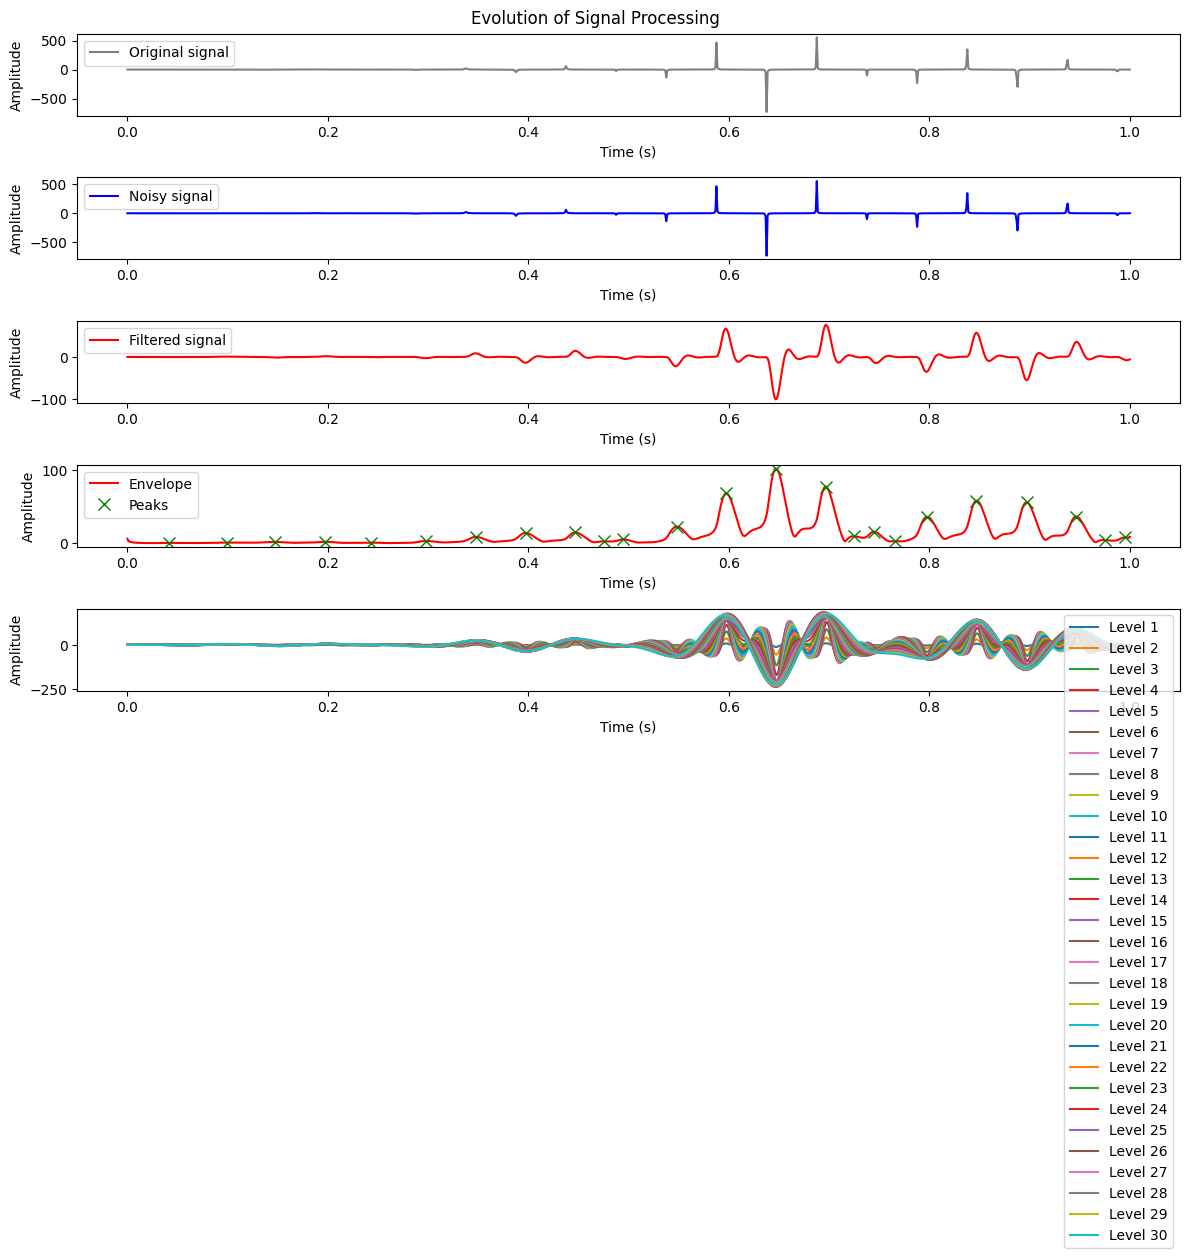

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, hilbert, find_peaks, cwt, ricker, spectrogram

def signal_processing_evolution(signal_function, fs=1000, T=1.0, freq=5):
    # Create a time array
    t = np.linspace(0, T, int(fs * T), dtype=float)

    # Generate signal
    x = 0.5 * signal_function(2 * np.pi * freq * t)

    # Add some noise to the signal
    x_noisy = x + 0.2 * np.random.randn(len(t))

    # Create a Butterworth lowpass filter
    b, a = butter(4, 0.1, btype='low')
    x_filtered = lfilter(b, a, x_noisy)

    # Compute the amplitude envelope of the signal using Hilbert transform
    analytic_signal = hilbert(x_filtered)
    x_envelope = np.abs(analytic_signal)

    # Find peaks in the envelope signal
    peaks, _ = find_peaks(x_envelope, prominence=0.1)

    # Perform continuous wavelet transform (CWT)
    widths = np.arange(1, 31)
    cwt_coeffs = cwt(x_filtered, ricker, widths)

    # Compute the frequency spectra
    frequencies = np.fft.fftfreq(len(t), 1 / fs)
    x_fft = np.fft.fft(x)
    x_noisy_fft = np.fft.fft(x_noisy)
    x_filtered_fft = np.fft.fft(x_filtered)

    # Compute the spectrogram of the original signal
    f, time, Sxx = spectrogram(x_noisy, fs)

    # Create a plot with multiple subplots
    fig, axs = plt.subplots(5, 1, figsize=(12, 12))
    fig.suptitle('Evolution of Signal Processing')

    # Plot the original signal
    axs[0].plot(t, x, label='Original signal', color='grey')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Amplitude')
    axs[0].legend(frameon=True)

    # Plot the noisy signal
    axs[1].plot(t, x_noisy, label='Noisy signal', color='blue')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Amplitude')
    axs[1].legend(frameon=True)

    # Plot the filtered signal
    axs[2].plot(t, x_filtered, label='Filtered signal', color='red')
    axs[2].set_xlabel('Time (s)')
    axs[2].set_ylabel('Amplitude')
    axs[2].legend(frameon=True)

    # Plot the envelope and peaks
    axs[3].plot(t, x_envelope, label='Envelope', color='red')
    axs[3].plot(t[peaks], x_envelope[peaks], 'x', color='green', markersize=8, label='Peaks')
    axs[3].set_xlabel('Time (s)')
    axs[3].set_ylabel('Amplitude')
    axs[3].legend(frameon=True)

    # Plot the wavelet coefficients
    for i, coeff in enumerate(cwt_coeffs):
        axs[4].plot(t, np.real(coeff), label=f'Level {i+1}')
    axs[4].set_xlabel('Time (s)')
    axs[4].set_ylabel('Amplitude')
    axs[4].legend(frameon=True)

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

# Call the function with a signal function
signal_processing_evolution(crazy_signal, freq=2)


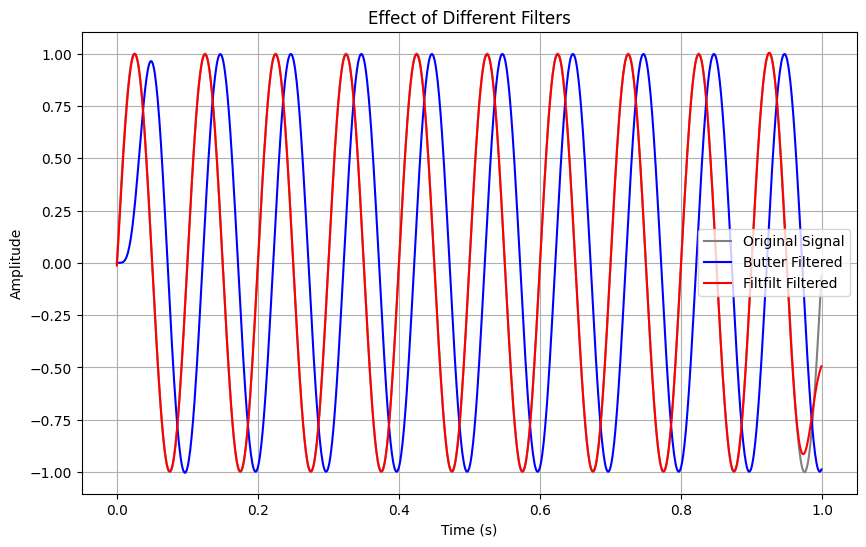

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, filtfilt

def generate_signal(freq, duration, fs):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    signal = np.sin(2 * np.pi * freq * t)
    return t, signal

def apply_filter(signal, fs, cutoff_freq, filter_type):
    nyquist_freq = 0.5 * fs
    cutoff = cutoff_freq / nyquist_freq

    if filter_type == 'butter':
        b, a = butter(4, cutoff, btype='low')
        filtered_signal = lfilter(b, a, signal)
    elif filter_type == 'filtfilt':
        b, a = butter(4, cutoff, btype='low')
        filtered_signal = filtfilt(b, a, signal)
    else:
        raise ValueError("Invalid filter type")

    return filtered_signal

# Parameters
freq = 10  # Frequency of the signal
duration = 1.0  # Duration of the signal in seconds
fs = 1000  # Sampling frequency
cutoff_freq = 20  # Cutoff frequency for the filter

# Generate the signal
t, signal = generate_signal(freq, duration, fs)

# Apply different filters
butter_filtered = apply_filter(signal, fs, cutoff_freq, 'butter')
filtfilt_filtered = apply_filter(signal, fs, cutoff_freq, 'filtfilt')

# Plot the original signal and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal', color='gray')
plt.plot(t, butter_filtered, label='Butter Filtered', color='blue')
plt.plot(t, filtfilt_filtered, label='Filtfilt Filtered', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Effect of Different Filters')
plt.legend()
plt.grid(True)
plt.show()


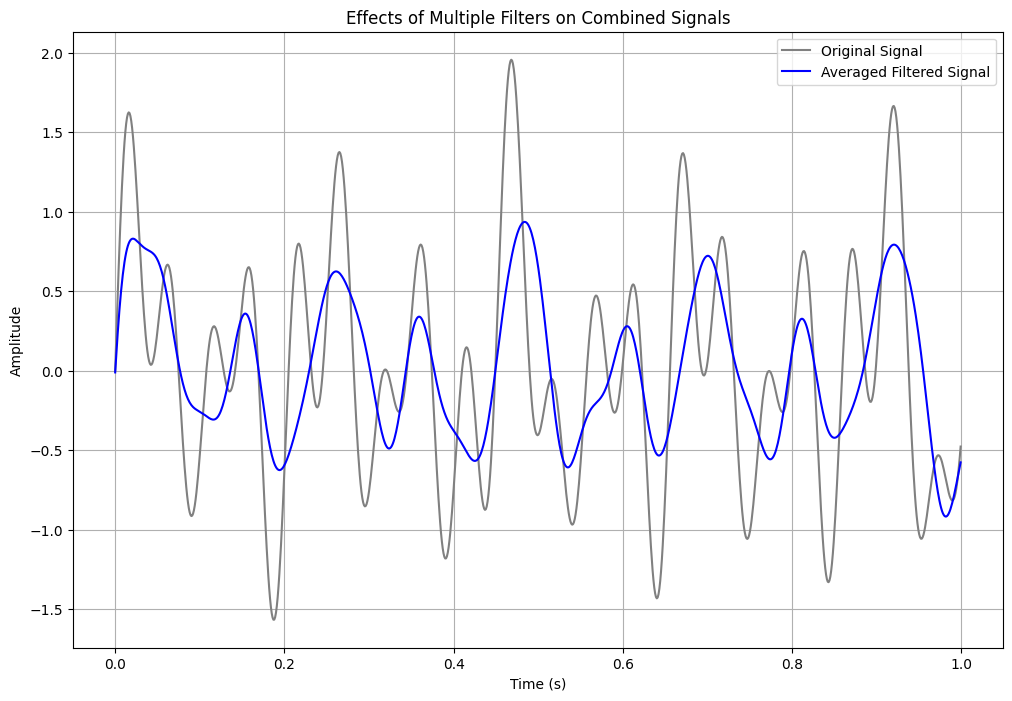

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, filtfilt, cheby1, sosfilt, spectrogram, savgol_filter, wiener

def generate_signal(freq, duration, fs):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    signal = np.sin(2 * np.pi * freq * t)
    return t, signal

def combine_signals(signals):
    combined_signal = np.sum(signals, axis=0)
    return combined_signal

# Parameters
num_signals = 5  # Number of signals to combine
freqs = np.random.uniform(low=1, high=20, size=num_signals)  # Random frequencies
amplitudes = np.random.uniform(low=0.1, high=1.0, size=num_signals)  # Random amplitudes
duration = 1.0  # Duration of the signals in seconds
fs = 1000  # Sampling frequency
cutoff_freq = 20  # Cutoff frequency for the filters

# Generate individual signals
signals = []
for freq, amplitude in zip(freqs, amplitudes):
    _, signal = generate_signal(freq, duration, fs)
    signals.append(amplitude * signal)

# Combine the signals
combined_signal = combine_signals(signals)

# Apply multiple filters and average the filtered signals
filtered_signals = []
filter_names = ['Butterworth', 'Filtfilt', 'Chebyshev Type I', 'SOS', 'Savitzky-Golay', 'Wiener']
for filter_name in filter_names:
    if filter_name == 'Butterworth':
        b, a = butter(4, cutoff_freq / (0.5 * fs), btype='low')
        filtered_signal = lfilter(b, a, combined_signal)
    elif filter_name == 'Filtfilt':
        b, a = butter(4, cutoff_freq / (0.5 * fs), btype='low')
        filtered_signal = filtfilt(b, a, combined_signal)
    elif filter_name == 'Chebyshev Type I':
        b, a = cheby1(4, 1, cutoff_freq / (0.5 * fs), btype='low')
        filtered_signal = lfilter(b, a, combined_signal)
    elif filter_name == 'SOS':
        sos = butter(4, cutoff_freq / (0.5 * fs), btype='low', output='sos')
        filtered_signal = sosfilt(sos, combined_signal)
    elif filter_name == 'Savitzky-Golay':
        filtered_signal = savgol_filter(combined_signal, window_length=51, polyorder=3)
    elif filter_name == 'Wiener':
        filtered_signal = wiener(combined_signal)

    filtered_signals.append(filtered_signal)

# Calculate the averaged filtered signal
averaged_filtered_signal = np.mean(filtered_signals, axis=0)

# Plot the original signal and the averaged filtered signal
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(combined_signal)) / fs, combined_signal, label='Original Signal', color='gray')
plt.plot(np.arange(len(averaged_filtered_signal)) / fs, averaged_filtered_signal, label='Averaged Filtered Signal', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Effects of Multiple Filters on Combined Signals')
plt.legend()
plt.grid(True)


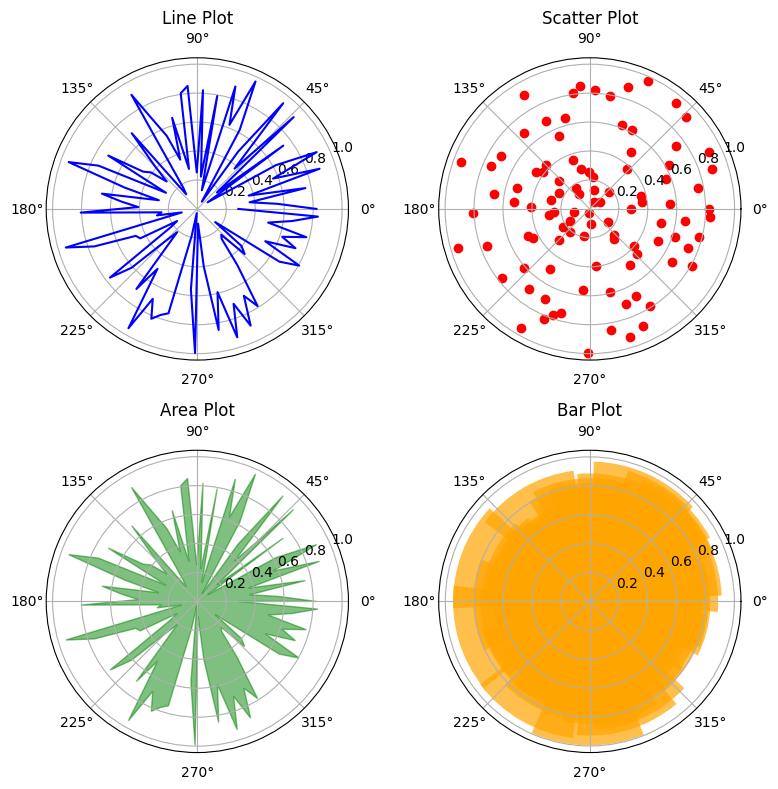

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
theta = np.linspace(0, 2 * np.pi, 100)  # Angle values
radius = np.random.rand(100)  # Random radius values

# Matplotlib
plt.figure(figsize=(8, 8))

# Line plot
plt.subplot(221, projection='polar')
plt.plot(theta, radius, color='blue')
plt.title('Line Plot')

# Scatter plot
plt.subplot(222, projection='polar')
plt.scatter(theta, radius, color='red')
plt.title('Scatter Plot')

# Area plot
plt.subplot(223, projection='polar')
plt.fill(theta, radius, color='green', alpha=0.5)
plt.title('Area Plot')

# Bar plot
plt.subplot(224, projection='polar')
plt.bar(theta, radius, color='orange', alpha=0.7)
plt.title('Bar Plot')

plt.tight_layout()
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

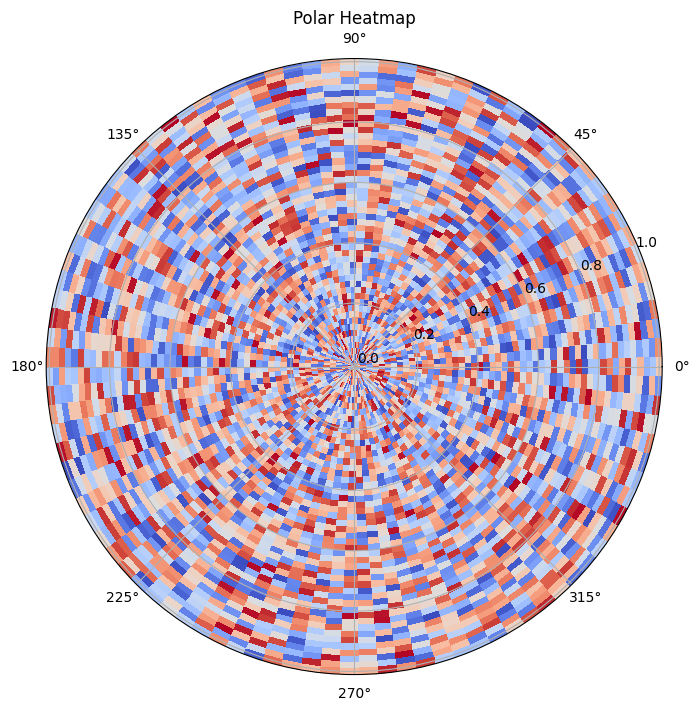

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for the heatmap
theta = np.linspace(0, 2 * np.pi, 100)  # Angle values
r = np.linspace(0, 1, 50)  # Radius values
data = np.random.rand(50, 100)  # Random data for the heatmap

# Create polar heatmap
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')
ax.pcolormesh(theta, r, data, cmap='coolwarm')
plt.title('Polar Heatmap')
plt.colorbar()
plt.show()


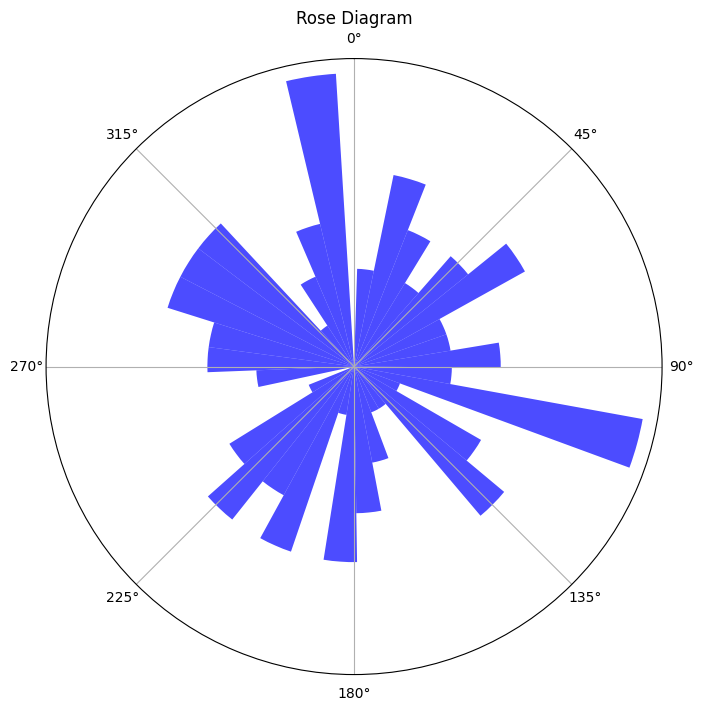

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random directional data
theta = np.random.uniform(low=0, high=2 * np.pi, size=100)

# Create rose diagram
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')
ax.hist(theta, bins=36, color='blue', alpha=0.7)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rticks([])  # Remove radial ticks
plt.title('Rose Diagram')
plt.show()


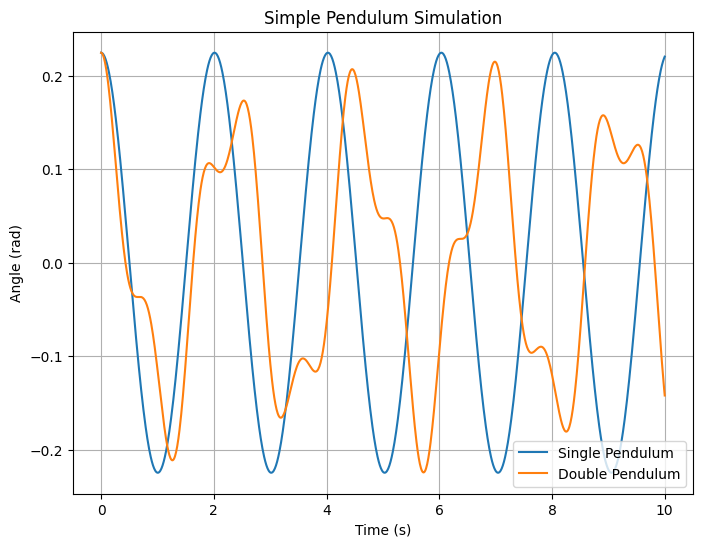

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the pendulum system
def pendulum(y, t, L, g):
    theta, omega = y
    dydt = [omega, -g/L * np.sin(theta)]
    return dydt

def double_pen(y, t, L1, L2, m1, m2, g):
    theta1, omega1, theta2, omega2 = y
    dydt = [omega1,
            -g * (2 * m1 + m2) * np.sin(theta1) - m2 * g * np.sin(theta1 - 2 * theta2) - 2 * np.sin(theta1 - theta2) * m2 * (omega2 ** 2 * L2 + omega1 ** 2 * L1 * np.cos(theta1 - theta2)) / (L1 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2))),
            omega2,
            2 * np.sin(theta1 - theta2) * (omega1 ** 2 * L1 * (m1 + m2) + g * (m1 + m2) * np.cos(theta1) + omega2 ** 2 * L2 * m2 * np.cos(theta1 - theta2)) / (L2 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)))]
    return dydt

# Pendulum parameters
L = 1.0  # Length of the pendulum (in meters)
g = 9.81  # Acceleration due to gravity (in m/s^2)
theta0 = (2.*np.pi)/np.random.randint(4, 100)  # Initial angle (in radians)
omega0 = 0.0  # Initial angular velocity (in rad/s)
t = np.linspace(0, 10, 1000)  # Time array (in seconds)

# Numerical integration
y0 = [theta0, omega0]
sol = odeint(pendulum, y0, t, args=(L, g))
sol2 = odeint(double_pen, [theta0, omega0, theta0, omega0], t, args=(L, L, 1, 1, g))
theta_num = sol[:, 0]
theta_num2 = sol2[:, 0]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(t, theta_num, label='Single Pendulum')
plt.plot(t, theta_num2, label='Double Pendulum')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Simple Pendulum Simulation')
plt.legend()
plt.grid(True)
plt.show()


/home/goose/.py311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


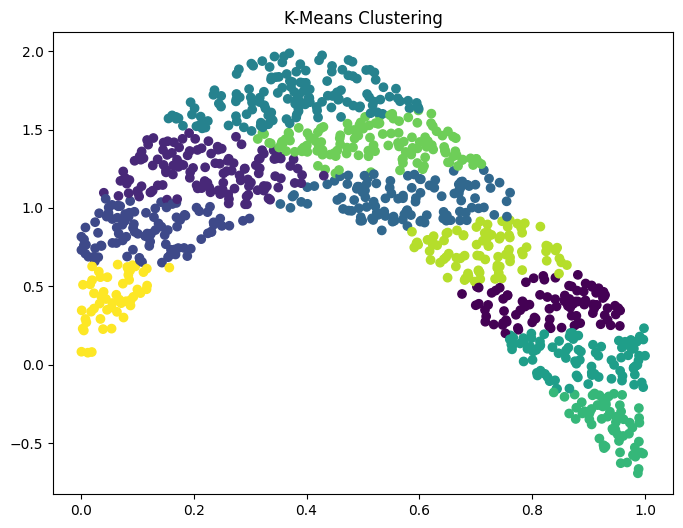

In [97]:
# K-clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate some random data
x = np.random.rand(1000)

# K-means clustering on interesxting data
y = np.random.rand(1000) + np.sin(4 * x)

# K-means clustering
kmeans = KMeans(n_clusters=10)

# Fit the data
kmeans.fit(np.column_stack((x, y)))

# Predict the labels
labels = kmeans.predict(np.column_stack((x, y)))

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()


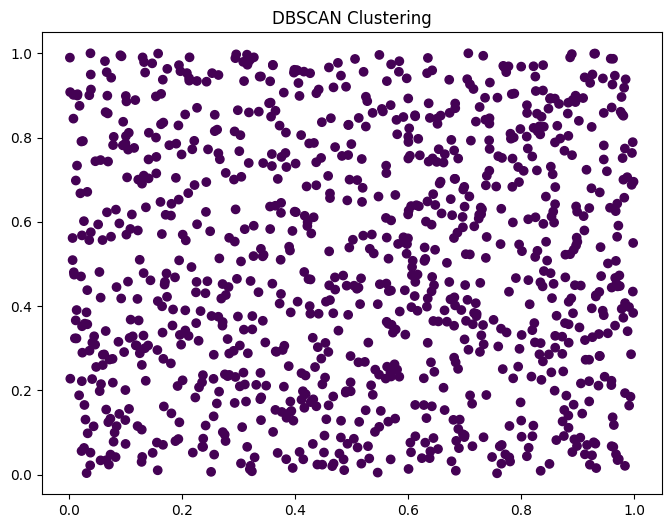